
https://youtu.be/x3joYu5VI38

https://stackoverflow.com/questions/61401114/neural-network-perceptron-visualizing-decision-boundary-as-a-hyperplane-wh


In [17]:
# AND GATE

data = [ [-1, -1, 1],
         [-1,  1, 1],
         [ 1, -1, 1],
         [ 1,  1, 1] ]
target = [-1,
          -1,
          -1,
           1 ]


In [18]:
#OR Gate
"""
data = [ [-1, -1, 1],
         [-1,  1, 1],
         [ 1, -1, 1],
         [ 1,  1, 1] ]
target = [-1,
           1,
           1,
           1 ]
           """

'\ndata = [ [-1, -1, 1],\n         [-1,  1, 1],\n         [ 1, -1, 1],\n         [ 1,  1, 1] ]\ntarget = [-1,\n           1,\n           1,\n           1 ]\n           '

 Datos de entrenamiento:

In [10]:
print ("Data:",data)
print ("target", target)

Data: [[-1, -1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]]
target [-1, -1, -1, 1]


 Initialize weights and bias and learning rate

In [11]:
data = data[::-1]

target = target[::-1]

print ("Data", data)
print ("Target", target)

Data [[1, 1, 1], [1, -1, 1], [-1, 1, 1], [-1, -1, 1]]
Target [1, -1, -1, -1]


iterate over data training

In [12]:
from tabulate import tabulate

w1 = 0.0
w2 = 0.0
b = 0.0

lr = 1

iterations= 6

data_out = [ ]
weigths = [ ]
weigths.append( [w1, w2, b])

for epoch in range ( iterations):

  for x,y in zip (data,target):
    yin = w1*x[0] + w2*x[1] + b*x[2]

    #activation function
    if ( yin < 0.0  ):
        yin = -1
    else:
        if (yin == 0.0):
          yin =0.0
        if ( yin > 0.0 ):
          yin = 1

    e = y-yin

    if int(y) != int(yin):  # update weigths and bias
      w1 = w1 + lr*y*x[0]
      w2 = w2 + lr*y*x[1]
      b = b + lr*y
      #store the updated weights
      weigths.append( [w1, w2, b])

      data_out.append(  [epoch, x[0], x[1], x[2], yin, y, y, e, '-', w1,w2,b, int(y) != int(yin)] )

  data_out.append (['-','-','-','-','-','-','-','-','-','-','-'])



print(tabulate( data_out,
                headers=['Epoch', 'x1', 'x2', 'b', 'yin', 'y', 't', 'E','-', 'w1', 'w2','b', 'update']))
#print("\n")

Epoch    x1    x2    b    yin    y    t    E    -    w1    w2      b  update
-------  ----  ----  ---  -----  ---  ---  ---  ---  ----  ----  ---  --------
0        1     1     1    0.0    1    1    1.0  -    1.0   1.0     1  True
0        1     -1    1    1      -1   -1   -2   -    0.0   2.0     0  True
0        -1    1     1    1      -1   -1   -2   -    1.0   1.0    -1  True
-        -     -     -    -      -    -    -    -    -     -
-        -     -     -    -      -    -    -    -    -     -
-        -     -     -    -      -    -    -    -    -     -
-        -     -     -    -      -    -    -    -    -     -
-        -     -     -    -      -    -    -    -    -     -
-        -     -     -    -      -    -    -    -    -     -


Visual Representation

[0.0, 0.0, 0.0]
[1.0, 1.0, 1.0]
[0.0, 2.0, 0.0]
[1.0, 1.0, -1.0]


C:\Users\yuulf\AppData\Local\Temp\ipykernel_17516\3720772603.py:23: RuntimeWarning: invalid value encountered in scalar divide
  y = (-ws[2] -ws[0]*xi) /ws[1]


<Figure size 640x480 with 0 Axes>

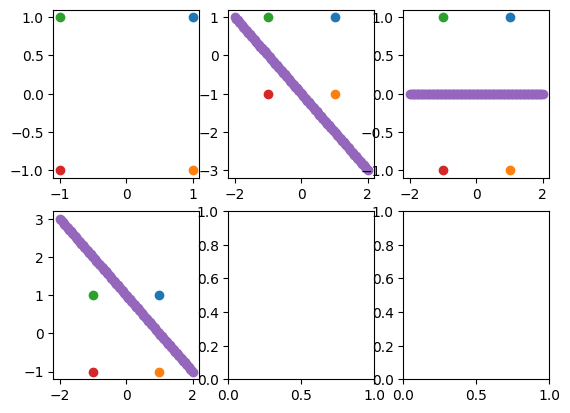

In [16]:
#construct hyperplane: ax + by + cz = d
import numpy as np
import matplotlib.pyplot as plt

a,b,c = w1,w2,b

data_arr = np.array( data )

x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)

x = np.linspace(x_min, x_max, 100)

#Xs,Ys = np.meshgrid(x,y)
#Zs = (d - a*Xs - b*Ys) / c

pairs = []

for ws in weigths:
  it = []
  for xi in  x :
    #   weigths.append( [w1, w2, b])
    y = (-ws[2] -ws[0]*xi) /ws[1]
    it.append( [xi,y])

  pairs.append(it)
  print(ws)

data_arr = np.array( data )
data_arr_x = data_arr [ : , 0 ]
data_arr_y = data_arr [ : , 1 ]

pairs = np.array(pairs)

plt.figure(1)

fig, axis = plt.subplots(2, 3)

for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )
    #axis[1,1].scatter(idx, idy )
    #axis[1,2].scatter(idx, idy )

axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
#axis[0,0].grid()
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
#axis[1,1].scatter(pairs[4,: ,0], pairs[4, :,1], cmap='viridis',  alpha = 0.25  )
#axis[1,2].scatter(pairs[5,: ,0], pairs[5, :,1], cmap='viridis' )

#plt.subplot(212)
#for idx,idy in zip ( data_arr_x, data_arr_y  ):
#    plt.scatter(idx, idy )

#plt.scatter(pairs[1,: ,0], pairs[1, :,1], cmap='viridis',  alpha = 0.25  )

#plt.subplot(21)
#for idx,idy in zip ( data_arr_x, data_arr_y  ):
#    plt.scatter(idx, idy )

#plt.scatter(pairs[2,: ,0], pairs[2, :,1], cmap='viridis',  alpha = 0.25  )

#plt.subplot(212)
#plt.plot(t, 2*s1)

plt.show()
